In [201]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from itertools import product
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.datasets import fetch_openml
from sklearn.exceptions import ConvergenceWarning


https://www.openml.org/d/1116

https://archive.ics.uci.edu/ml/datasets/Musk+(Version+2)

From wikipedia: "Musk is a class of aromatic substances commonly used as base notes in perfumery."

Certain molecules are "musk", others are "not musk". Don't stress about the definition of the dataset too much. The vector y will be 1 or 0 for "musk" yes/no. The data X consists of a bunch of numerical data associated with the molecule. Fit each of a GaussianNB, SVM.svc, and MLP Classifier to the data and assess performance on some holdout test data. For each, show the confusion matrix. which performs best?

In [202]:
X, y = fetch_openml('musk', return_X_y=True)

In [203]:
X.shape

(6598, 167)

In [204]:
X[0]

array([ 101.,   46., -108.,  -60.,  -69., -117.,   49.,   38., -161.,
         -8.,    5., -323., -220., -113., -299., -283., -307.,  -31.,
       -106., -227.,  -42.,  -59.,  -22.,  -67.,  189.,   81.,   17.,
        -27.,  -89.,  -67.,  105., -116.,  124., -106.,    5., -120.,
         63., -165.,   40.,  -27.,   68.,  -44.,   98.,  -33., -314.,
       -282., -335., -144.,  -13., -197.,   -2., -144.,  -13.,  -11.,
       -131.,  108.,  -43.,   42., -151.,   -4.,    8., -102.,   51.,
        -15.,  108., -135.,   59., -166.,   20.,  -20.,   23.,  -48.,
        -68., -299., -256.,  -97., -183.,  -24., -271., -229., -177.,
         -6.,    0., -129.,  112.,   15.,   36.,  -66.,  -54.,  -75.,
        132., -188.,  119., -120., -312.,   23.,  -55.,  -53.,  -26.,
        -71.,   41.,  -55.,  148., -247., -306., -308., -230., -166.,
        -35., -205., -280., -239.,  -53.,  -10.,  -23.,   25.,   -5.,
        163.,   61.,   59.,  -39.,   92.,   72.,  113., -107.,   80.,
         25.,  -27.,

In [205]:
y

array(['1', '1', '1', ..., '0', '0', '0'], dtype=object)

In [206]:
len(y)

6598

In [207]:
sum(map(lambda x: int(x), y))

1017

Solution:

In [208]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size = 0.3,
                                                random_state=1)

In [209]:
# Models

from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier


model_GNB, model_SVM, model_MLP = GaussianNB(), SVC(kernel='rbf', C=1E10), MLPClassifier(hidden_layer_sizes=(200,100,50,10), max_iter=20, alpha=1e-4,
                    solver='sgd', verbose=0, random_state=1,
                    learning_rate_init=.5) 


In [210]:
# Trying out a for loop :)

model_list = [model_GNB, model_SVM, model_MLP]

for x in model_list:
    print('---------------------------------------------------------------------------------------------')
    x.fit(Xtrain, ytrain)
    ypred = x.predict(Xtest)
    score = accuracy_score(ytest, ypred)
    matrix = confusion_matrix(ytest, ypred)
    print('This is a ' + str(x) + ' model. \n\n With the following matrix and accuracy score displayed: \n\n' + str(matrix) + '\n' + str(score) + '\n\n')


---------------------------------------------------------------------------------------------
This is a GaussianNB() model. 

 With the following matrix and accuracy score displayed: 

[[1542  150]
 [  65  223]]
0.8914141414141414


---------------------------------------------------------------------------------------------
This is a SVC(C=10000000000.0) model. 

 With the following matrix and accuracy score displayed: 

[[1692    0]
 [   0  288]]
1.0


---------------------------------------------------------------------------------------------
This is a MLPClassifier(hidden_layer_sizes=(200, 100, 50, 10), learning_rate_init=0.5,
              max_iter=20, random_state=1, solver='sgd', verbose=0) model. 

 With the following matrix and accuracy score displayed: 

[[1692    0]
 [ 288    0]]
0.8545454545454545




In [211]:
# Gaussian Naive Bayes model and performance

model_GNB.fit(Xtrain, ytrain)
ypred = model_GNB.predict(Xtest)

In [212]:
confusion_matrix(ytest, ypred)

array([[1542,  150],
       [  65,  223]], dtype=int64)

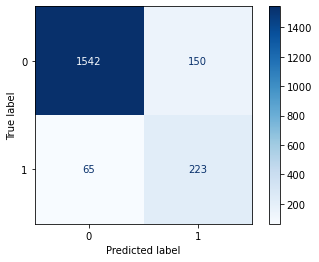

In [213]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(model_GNB, Xtest, ytest,
                                 cmap=plt.cm.Blues)

plt.rcParams['figure.figsize'] = [6, 6];

In [214]:
from sklearn.metrics import accuracy_score
accuracy_score(ytest, ypred)

0.8914141414141414

In [215]:
# SVM model and performance

model_SVM.fit(Xtrain, ytrain)
ypred = model_SVM.predict(Xtest)

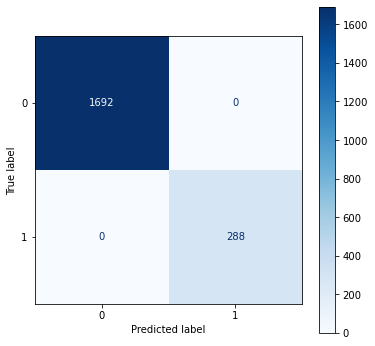

In [216]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(model_SVM, Xtest, ytest,
                                 cmap=plt.cm.Blues)

plt.rcParams['figure.figsize'] = [6, 6];

In [217]:
accuracy_score(ytest, ypred)

1.0

In [218]:
# MLP model and performance

model_MLP.fit(Xtrain, ytrain)
ypred = model_MLP.predict(Xtest)

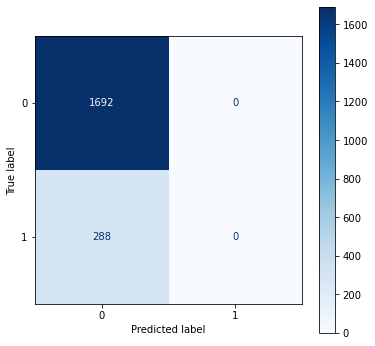

In [219]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(model_MLP, Xtest, ytest,
                                 cmap=plt.cm.Blues)

plt.rcParams['figure.figsize'] = [6, 6];

In [220]:
accuracy_score(ytest, ypred)

0.8545454545454545

# Which model performs best?

It seems that SVM model did the best with 100% accuracy followed by Gaussian Naive Bayes, and MLP did the worst job classifying out of the 3.

Kind of concerned about how well the SVM did though (might be a case for overfitting to future data; although the 100% accuracy was for the test data which means so far so good :))